In [2]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [3]:
ls

MyDrive/  Shareddrives/


In [4]:
cd /gdrive/MyDrive/dementia_detection

/gdrive/MyDrive/dementia_detection


In [5]:
ls

dementia_dataset.csv


# Importing Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [8]:
df_train=pd.read_csv('dementia_dataset.csv')
df_train.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [10]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


# EDA

In [11]:
df_train.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [12]:
df_train['SES']=df_train['SES'].fillna(df_train['SES'].mean())
df_train['MMSE']=df_train['MMSE'].fillna(df_train['MMSE'].mean())

In [13]:
df_train.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [14]:
df_train.Group.value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

In [15]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [16]:
binary_cols

['M/F']

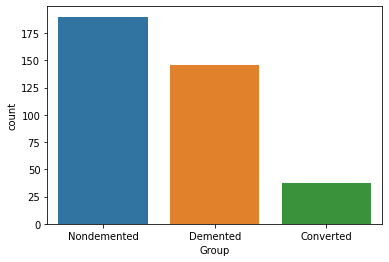

In [17]:
sns.countplot("Group", data=df_train)

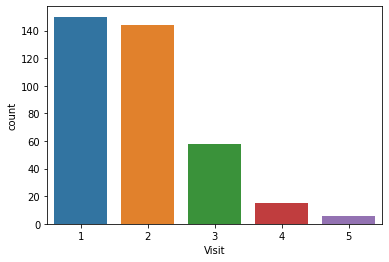

In [18]:
sns.countplot("Visit", data=df_train)

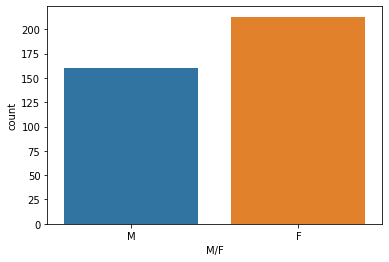

In [19]:
sns.countplot("M/F", data=df_train)

In [20]:
Group_numeric = {'Nondemented':2, 'Demented':1,'Converted':0}
df_train.Group.replace(Group_numeric, inplace=True)

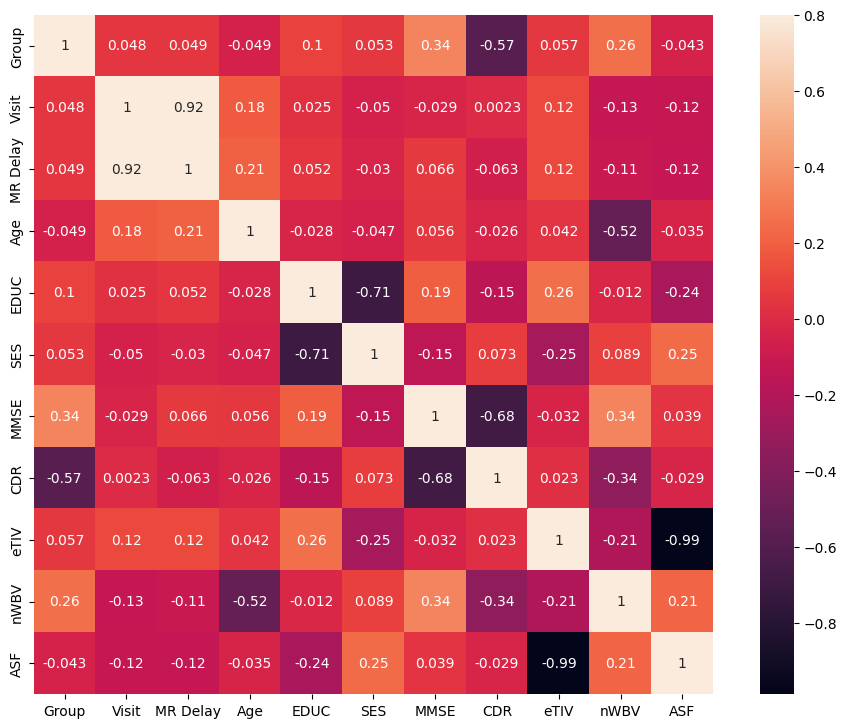

In [21]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

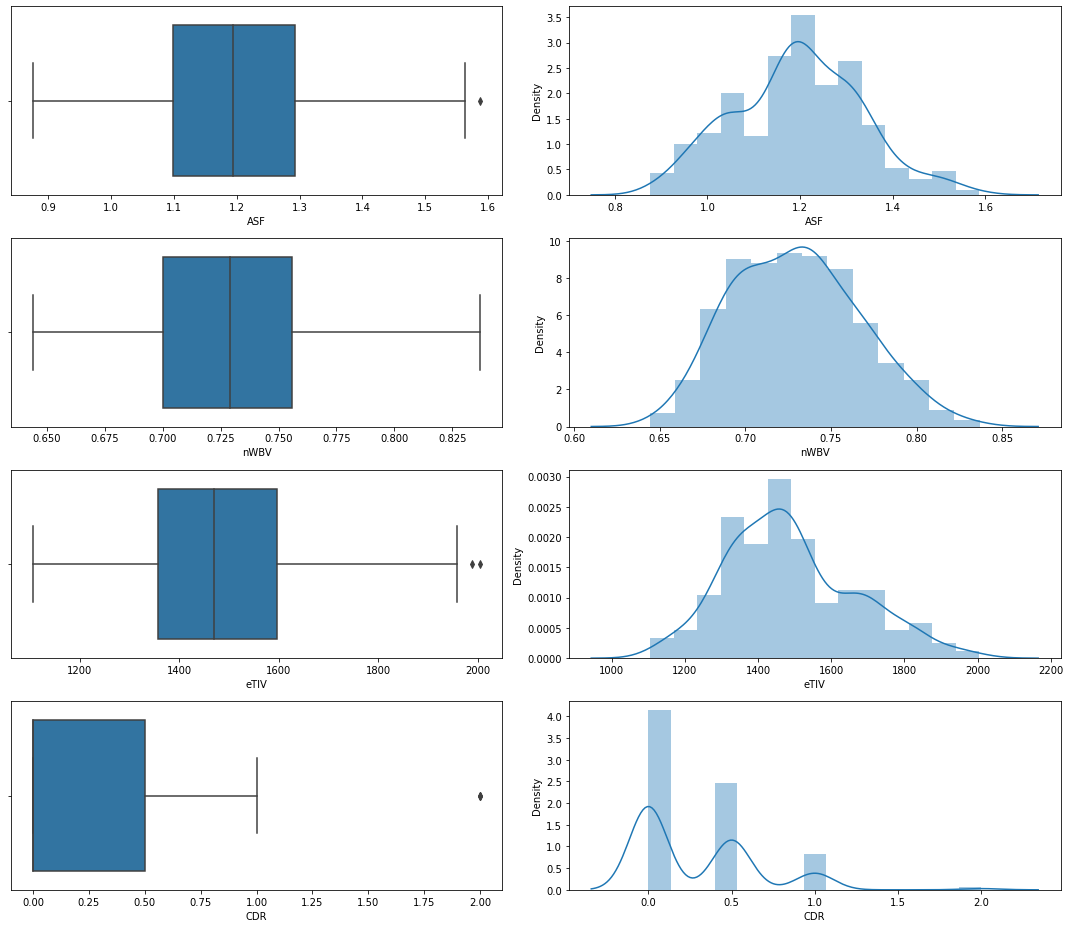

In [22]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= df_train["ASF"], ax = ax[0,0])
sns.distplot(df_train['ASF'], ax = ax[0,1])
sns.boxplot(x= df_train["nWBV"], ax = ax[1,0])
sns.distplot(df_train['nWBV'], ax = ax[1,1])
sns.boxplot(x= df_train["eTIV"], ax = ax[2,0])
sns.distplot(df_train['eTIV'], ax = ax[2,1])
sns.boxplot(x= df_train["CDR"], ax = ax[3,0])
sns.distplot(df_train['CDR'], ax = ax[3,1])
plt.tight_layout()

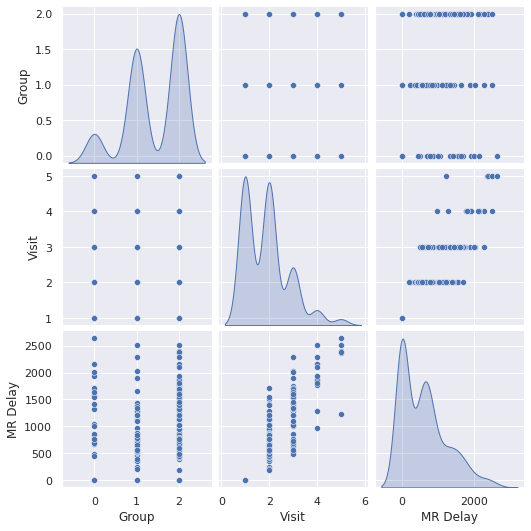

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [24]:

X = df_train.drop(['Subject ID', 'MRI ID', 'M/F', 'Hand','Group'], axis = 1)
Y = df_train["Group"]
x_Data = X.values
y_Data = Y.values

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [28]:
model.score(X_test,y_test)

0.84

In [29]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.88333333 0.86666667 0.9        0.89830508 0.96610169]


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [31]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.9228187919463087

In [32]:
confusion_matrix(y_train, pred)

array([[ 13,   4,   9],
       [  8, 106,   0],
       [  0,   2, 156]])

In [33]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [34]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [35]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.50      0.18      0.27        11
           1       0.94      0.94      0.94        32
           2       0.79      0.97      0.87        32

    accuracy                           0.84        75
   macro avg       0.74      0.70      0.69        75
weighted avg       0.81      0.84      0.81        75



In [36]:
cma = confusion_matrix(y_test, predicted_test)

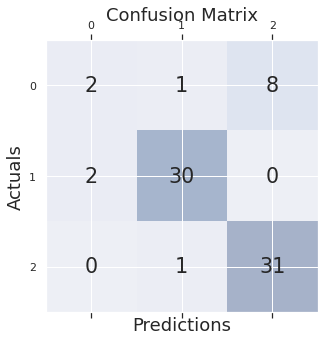

In [37]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier as rf

In [39]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [40]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

1.0

In [41]:
confusion_matrix(y_train, pred)

array([[ 26,   0,   0],
       [  0, 114,   0],
       [  0,   0, 158]])

In [42]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [43]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [44]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.27      0.43        11
           1       0.94      1.00      0.97        32
           2       0.82      0.97      0.89        32

    accuracy                           0.88        75
   macro avg       0.92      0.75      0.76        75
weighted avg       0.90      0.88      0.85        75



In [45]:
cma = confusion_matrix(y_test, pred_test)

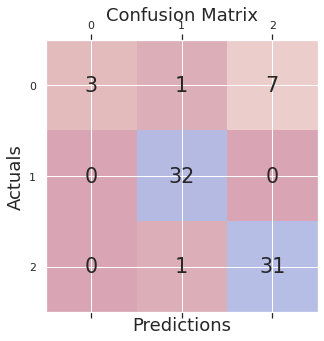

In [46]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [47]:
from sklearn import tree

In [48]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [49]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [50]:
confusion_matrix(y_train, pred1)

array([[ 26,   0,   0],
       [  0, 114,   0],
       [  0,   0, 158]])

In [51]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [52]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           0       0.43      0.27      0.33        11
           1       0.93      0.88      0.90        32
           2       0.79      0.94      0.86        32

    accuracy                           0.81        75
   macro avg       0.72      0.70      0.70        75
weighted avg       0.80      0.81      0.80        75



In [53]:
cma = confusion_matrix(y_test, pred1_test)

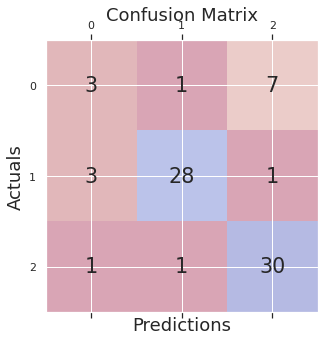

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [85]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.7449664429530202

In [86]:
confusion_matrix(y_train, pred_LR)

array([[  4,   1,  21],
       [  0,  75,  39],
       [  2,  13, 143]])

In [87]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [88]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.79      0.69      0.73        32
           2       0.55      0.75      0.63        32

    accuracy                           0.61        75
   macro avg       0.44      0.48      0.45        75
weighted avg       0.57      0.61      0.58        75



In [89]:
cma = confusion_matrix(y_test, pred_LR_test)

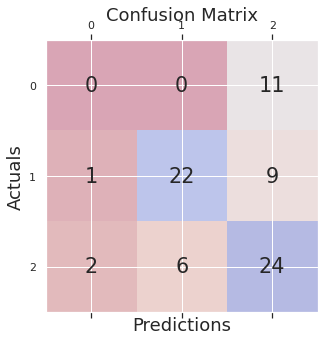

In [90]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [91]:
from sklearn.neural_network import MLPClassifier

In [92]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [93]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.5302013422818792

In [94]:
confusion_matrix(y_train, pred_NN)

array([[  0,   0,  26],
       [  0,   0, 114],
       [  0,   0, 158]])

In [95]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [96]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        32
           2       0.43      1.00      0.60        32

    accuracy                           0.43        75
   macro avg       0.14      0.33      0.20        75
weighted avg       0.18      0.43      0.26        75



In [97]:
cma = confusion_matrix(y_test, pred_NN_test)

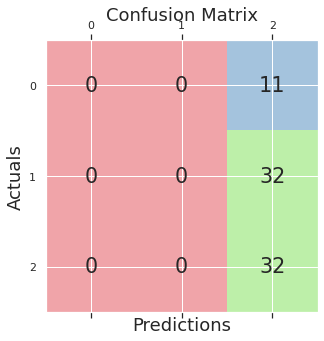

In [98]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [70]:
import xgboost as xgb

In [71]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [72]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

0.9932885906040269

In [73]:
confusion_matrix(y_train, pred_XGB)

array([[ 24,   0,   2],
       [  0, 114,   0],
       [  0,   0, 158]])

In [74]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [75]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           0       0.80      0.36      0.50        11
           1       0.94      0.97      0.95        32
           2       0.84      0.97      0.90        32

    accuracy                           0.88        75
   macro avg       0.86      0.77      0.78        75
weighted avg       0.88      0.88      0.86        75



In [76]:
cma = confusion_matrix(y_test, pred_XGB_test)

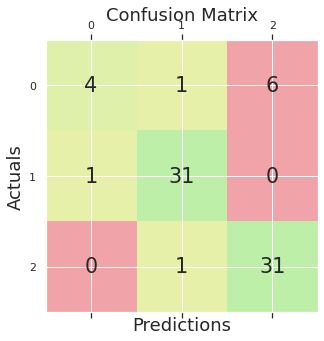

In [77]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

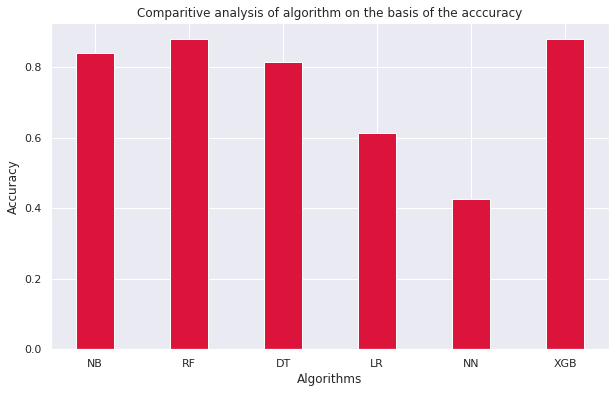

In [78]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


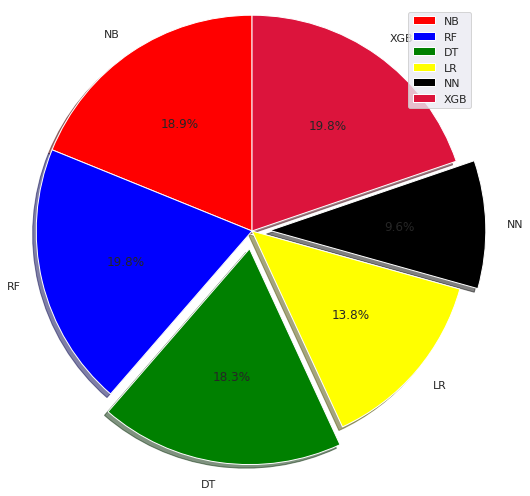

In [79]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [99]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']